In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import os
import seaborn as sns
from IPython.display import display, Image
import numpy as np
import re
import json

pd.options.display.max_columns = None
%matplotlib inline

# 한글 폰트
plt.rcParams['font.family'] = 'NanumGothic'
# 마이너스 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔 고딕의 경로
font_prop = fm.FontProperties(fname=font_path).get_name()

# 한글 폰트 설정}
matplotlib.rcParams['font.family'] = font_prop

# 전역 팔레트 설정 (예: 'Set2' 팔레트 사용)
sns.set_palette('Set2')

In [41]:
# 데이터 불러오기
regular_season = pd.read_csv('../datas/Regular_Season_Batter.csv')

# 결측값 확인
regular_season.isna().sum()

batter_id             0
batter_name           0
year                  0
team                  0
avg                   0
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                   0
OBP                   0
E                     0
height/weight         0
year_born             0
position              0
career                0
starting_salary    1067
OPS                   0
pos                   0
hand                  0
country               0
dtype: int64

In [42]:
# 급여 결측값이 있는 행만 추출(이름, 연도, 연봉)
display(regular_season[regular_season.isna().any(axis=1)][['batter_name', 'year', 'starting_salary']])
# 결측값이 있는 선수 목록
print(sorted(set(list(regular_season[regular_season.isna().any(axis=1)]['batter_name']))))

,batter_name,year,starting_salary
0,가르시아,2018,NaN
12,백승룡,2005,NaN
13,백승룡,2006,NaN
14,백승룡,2007,NaN
15,백승룡,2008,NaN
...,...,...,...
2427,황선일,2011,NaN
2428,황선일,2012,NaN
2429,황선일,2015,NaN
2445,황정립,2012,NaN


['가르시아', '강병식', '강봉규', '강정호', '고도현', '고동진', '고메즈', '고영민', '국해성', '권용관', '김경모', '김경언', '김광연', '김대륙', '김동엽', '김동주', '김민하', '김사훈', '김연훈', '김원석', '김원섭', '김응민', '김종덕', '김종찬', '김종호', '김진곤', '김현수', '나경민', '나바로', '나성용', '남태혁', '노수광', '대니돈', '도태훈', '러프', '로맥', '로메로', '로사리오', '로티노', '마낙길', '모상기', '문우람', '박계현', '박기남', '박노민', '박상규', '박용근', '박재상', '박재홍', '박준서', '박진만', '박진원', '박찬도', '박해민', '백승룡', '백창수', '샌즈', '서건창', '성의준', '손시헌', '손용석', '송민섭', '송지만', '스나이더', '신경현', '신명철', '신성현', '신현철', '안치용', '알드리지', '양영동', '연경흠', '오재원', '오재필', '용덕한', '우동균', '유선정', '유재혁', '윤병호', '윤완주', '윤요섭', '윤진호', '이대수', '이명환', '이민재', '이상호', '이성우', '이승재', '이양기', '이여상', '이용규', '이우민', '이원재', '이인구', '이정식', '이종범', '이종환', '이준수', '이준호', '이지영', '이천웅', '이태원', '이현곤', '이홍구', '이희근', '임재철', '장성호', '장시윤', '전현태', '정경운', '정보명', '정상교', '정수성', '정현석', '정형식', '정훈', '조동화', '조성환', '조영훈', '조인성', '조중근', '지성준', '지재옥', '진갑용', '차일목', '채상병', '채은성', '초이스', '최경철', '최동수', '최민구', '최선호', '최영진', '최재훈', '최항', '최훈락', '칸투', '테임즈', '피에', '한상훈', '한윤섭', '허도환', '현재윤', '

In [43]:
'''
결측값이 있는 선수를 채워주려고 합니다.
검색해 보니 스텟티즈(https://statiz.sporki.com/)에 선수 데이터가 자세하게 나와있어 이 사이트의 연봉 데이터를 이용하려고 합니다.

먼저 현재 가지고 있는 regular 데이터의 연봉데이터와 비교해 봅니다.
'''
display(regular_season[['batter_name', 'year', 'starting_salary', 'team']])

'''
강경학 선수가 초봉이 10000만원(1억)이였습니다.
스텟티즈에서 확인해 보았습니다.
참고로 강경학 선수는 21년 중에 한화로 이적하여 한화로 표시되는 것 같습니다.
''';

,batter_name,year,starting_salary,team
0,가르시아,2018,NaN,LG
1,강경학,2011,10000만원,한화
2,강경학,2014,10000만원,한화
3,강경학,2015,10000만원,한화
4,강경학,2016,10000만원,한화
...,...,...,...,...
2449,황진수,2014,4000만원,롯데
2450,황진수,2015,4000만원,롯데
2451,황진수,2016,4000만원,롯데
2452,황진수,2017,4000만원,롯데


![nn](image1.png)

In [44]:
'''
스텟티즈에 있는 연봉은 14년부터 나와있습니다.

황진수 선수로 비교해 보았습니다.
'''
display(regular_season[regular_season['batter_name'] == '황진수'][['year', 'starting_salary', 'team']])
Image('image2.png')

'''
역시 가지고 있는 데이터와 사이트에 있는 데이터가 다릅니다.

일단 등록되어있는 데이터와 결측값의 숫자를 비교해 봅니다.
만약 등록되어있는 데이터가 많으면 그냥 사용합니다.
''';

nan_data = regular_season.isna().any(axis=1).sum()     # 결측값이 있는 행
nonnan_data = (~regular_season.isna().any(axis=1)).sum()  # 결측값이 없는 행
print(nan_data, nonnan_data, round(nonnan_data/(nan_data+nonnan_data) * 100, 1), '%')

'''
그래도 절반 이상의 데이터가 있기 때문에 그냥 사용하도록 하겠습니다.
''';

,year,starting_salary,team
2447,2012,4000만원,롯데
2448,2013,4000만원,롯데
2449,2014,4000만원,롯데
2450,2015,4000만원,롯데
2451,2016,4000만원,롯데
2452,2017,4000만원,롯데
2453,2018,4000만원,롯데


1067 1387 56.5 %


In [45]:
display(regular_season['starting_salary'].value_counts())

'''
"만원"과 "달러"가 같이 있습니다.
1달러에 대충 1400원으로 두고 계산하겠습니다.
'''

# 달러가 있다면 환률을 계산하고 적용한다. 그리고 만원 단위를 제거한다.
regular_season['starting_salary'] = regular_season['starting_salary'].apply(lambda x: x if pd.isnull(x) else int(x.split('달러')[0]) * 1400 // 10000 if isinstance(x, str) and '달러' in x else x.split('만원')[0])

# 숫자형으로 변환
regular_season['starting_salary'] = regular_season['starting_salary'].apply(lambda x: int(x) if not pd.isnull(x) else x).astype('Int64')
regular_season['starting_salary'].value_counts()

starting_salary
10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
12000만원      62
4000만원       62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
6500만원       10
33000만원      10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: count, dtype: int64

starting_salary
10000    177
6000     117
3000     105
9000      97
5000      91
8000      89
30000     74
4000      62
12000     62
7000      55
18000     54
11000     49
13000     48
20000     46
25000     45
15000     41
14000     30
16000     28
28000     20
43000     17
45000     16
27000     15
21000     13
23000     12
6500      10
33000     10
42000      3
17000      1
Name: count, dtype: Int64

In [46]:
# 초봉 라벨 리스트
salary_list = sorted(set(regular_season['starting_salary'].loc[regular_season['starting_salary'].notnull()].apply(int)))
max(salary_list)    # 초봉 최대값

45000

In [47]:
regular_season['starting_salary'].loc[regular_season['starting_salary'].notnull()]

1       10000
2       10000
3       10000
4       10000
5       10000
        ...  
2449     4000
2450     4000
2451     4000
2452     4000
2453     4000
Name: starting_salary, Length: 1387, dtype: Int64

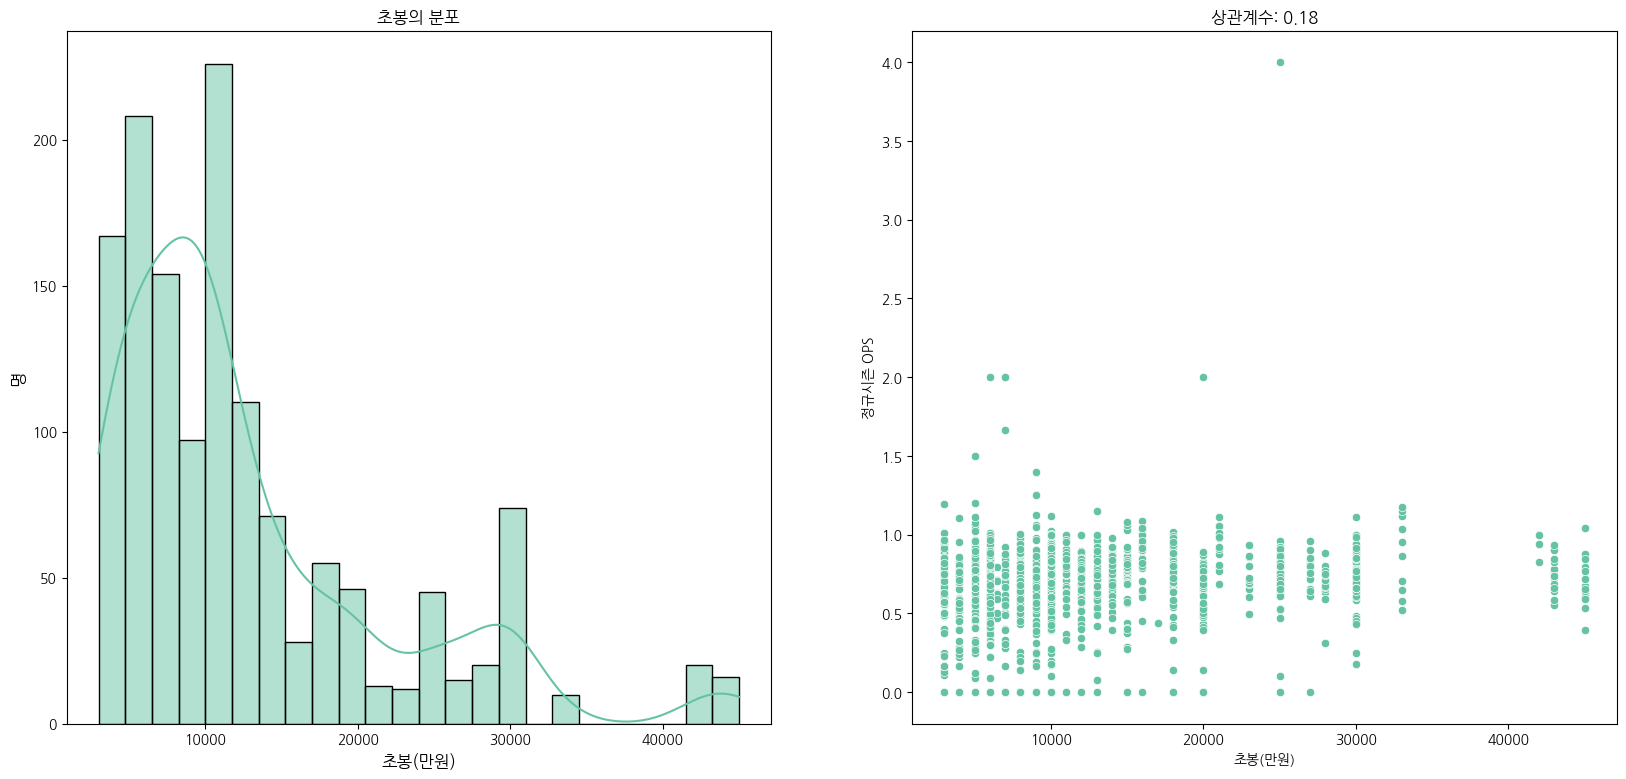

In [68]:
'''
이제 선수들 초봉 분포를 보려고 합니다.
'''

plt.figure(figsize=(20,9))

plt.subplot(1,2,1)
sns.histplot(regular_season['starting_salary'].loc[regular_season['starting_salary'].notnull()], kde=True)
plt.xlabel('초봉(만원)', fontsize=12)
plt.ylabel('명', fontsize=12)
plt.title('초봉의 분포')

plt.subplot(1,2,2)
correlation = regular_season['starting_salary'].corr(regular_season['OPS'])
sns.scatterplot(x=regular_season['starting_salary'], y=regular_season['OPS'])
plt.title(f'상관계수: {round(correlation,2)}')
plt.xlabel('초봉(만원)')
plt.ylabel('정규시즌 OPS')

plt.subplots_adjust(hspace=0.3)
plt.show()
'''
데이터가 10000만원(1억)쪽에 편향되어있습니다.
그리고 초봉과 OPS는 상관관계를 보여주지 못했습니다.
''';